In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import pywt
import librosa
import librosa.display

In [2]:
wavelet_form = 'db6'
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
audio_data, sr = librosa.load('./data/077-echo-guitar-skank.wav')

In [4]:
audio_data.shape

(137329,)

In [5]:
audio_data

array([-0.00925131, -0.01029749, -0.00885654, ..., -0.012232  ,
       -0.01700904,  0.        ], dtype=float32)

In [6]:
audio_data = audio_data/np.max(audio_data)

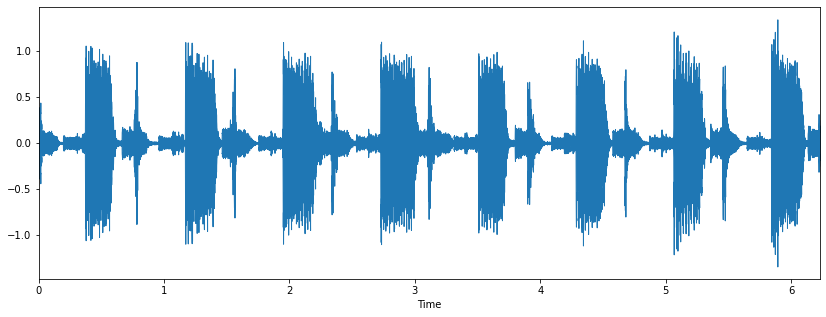

In [7]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(audio_data, sr=sr)

In [15]:
DWTcoeffs = pywt.dwt(audio_data, wavelet_form)

In [13]:
#DWTcoeffs = np.sort(DWTcoeffs)

In [16]:
 for keep in (0.5, 0.1, 0.05, 0.01, 0.005, 0.001):
    n_coef = []
    for coef in DWTcoeffs:
        tresh = coef[int(np.floor((1-keep) * len(coef)))]
        ind = np.abs(coef) > tresh
        Cfilt = DWTcoeffs * ind
        n_coef.extend(Cfilt)
    rec = pywt.idwt(n_coef[0], n_coef[1], wavelet=wavelet_form)
    wavfile.write(f'./data/keep-{keep}.wav', sr, rec)